In [1]:
import numpy as np
import sep
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams
import fitsio
%matplotlib inline
import os

rcParams['figure.figsize'] = [15., 8.]

In [2]:
  base_dir='/home/nacho/work/ZWO_FIRST_LIGHT/omegon104/M42/'
  _images=[]
  _images += [each for each in os.listdir(base_dir) if each.endswith('.fits')]
  images=list(map(lambda x: base_dir+x,_images) )
  print(images) 

['/home/nacho/work/ZWO_FIRST_LIGHT/omegon104/M42/232418093.fits']


In [3]:
refFilename = images[0]
data=fitsio.read(refFilename).astype(np.uint16)
print(data.shape,data.dtype)
#data = data.byteswap(inplace=True).newbyteorder()

(2816, 4128) uint16


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


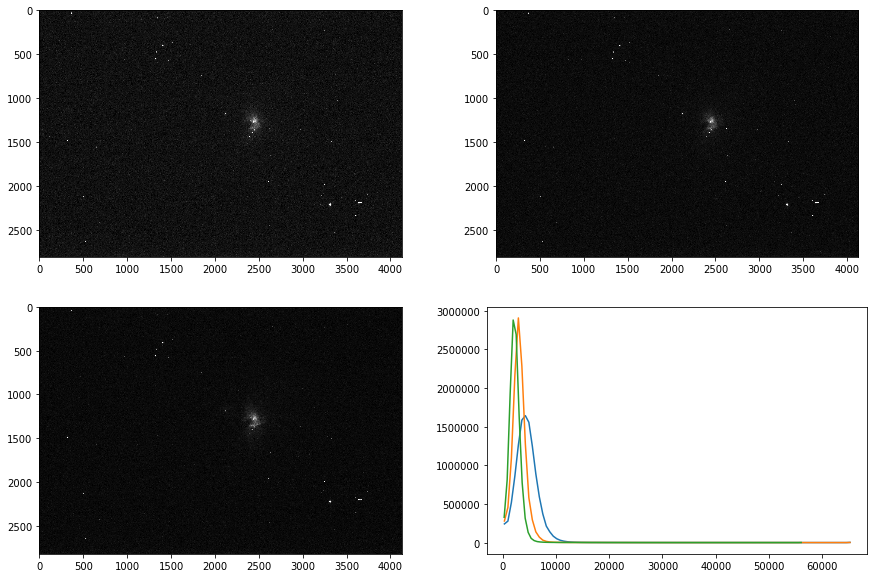

In [4]:
colour = cv2.cvtColor(data, cv2.COLOR_BAYER_BG2BGR)
colour[:,:,0]=colour[:,:,0]*1
colour[:,:,1]=colour[:,:,1]*1
colour[:,:,2]=colour[:,:,2]*1
plt.figure(figsize=(15,10))
for c in range(3):
    plt.subplot(2,2,c+1).imshow(colour[:,:,c],cmap=plt.cm.get_cmap("gray"))
for c in range(3):
    data=colour[:,:,c].reshape(-1)
    y,binEdges=np.histogram(data,bins=100)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    plt.subplot(2,2,4).plot(bincenters,y,'-')
    #plt.subplot(2,2,4).hist(data,bins=500)
plt.show()

In [5]:
data=fitsio.read(refFilename).astype(np.float64)
print(data.shape,data.dtype)
# measure a spatially varying background on the image
bkg = sep.Background(data)
print(bkg)
print(bkg.globalback)
print(bkg.globalrms)

(2816, 4128) float64
2598.53369140625
1678.176513671875


In [6]:
help(sep.Background)

Help on class Background in module sep:

class Background(builtins.object)
 |  Background(data, mask=None, maskthresh=0.0, bw=64, bh=64,
 |             fw=3, fh=3, fthresh=0.0)
 |  
 |  Representation of spatially variable image background and noise.
 |  
 |  Parameters
 |  ----------
 |  data : 2-d `~numpy.ndarray`
 |      Data array.
 |  mask : 2-d `~numpy.ndarray`, optional
 |      Mask array, optional
 |  maskthresh : float, optional
 |      Mask threshold. This is the inclusive upper limit on the mask value
 |      in order for the corresponding pixel to be unmasked. For boolean
 |      arrays, False and True are interpreted as 0 and 1, respectively.
 |      Thus, given a threshold of zero, True corresponds to masked and
 |      False corresponds to unmasked.
 |  bw, bh : int, optional
 |      Size of background boxes in pixels. Default is 64.
 |  fw, fh : int, optional
 |      Filter width and height in boxes. Default is 3.
 |  fthresh : float, optional
 |      Filter threshold. 

In [7]:
#bkg_image=bkg.back()
bkg_image = np.array(bkg)
print(bkg_image.dtype,bkg_image.shape)

float64 (2816, 4128)


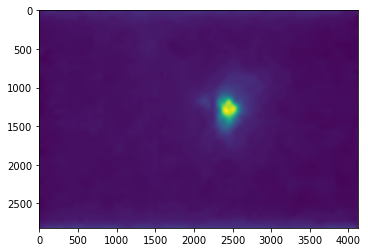

In [8]:
plt.imshow(bkg_image)

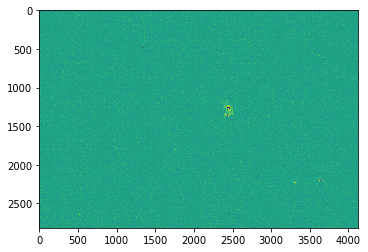

In [9]:
data_sub=data-bkg
plt.imshow(data_sub)

In [10]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

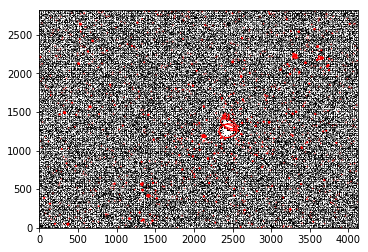

In [11]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [47]:
objects['x']

array([ 614.18305192, 1784.73346277, 2826.42934759, ..., 2268.69953163,
       1181.66855934, 1763.22605333])